In [2]:
!pip install tensorflow --user

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import pandas as pd
import numpy as np
import pickle
np.random.seed(1212)
import keras
from keras.models import Model
#from keras.layers import * from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json

In [4]:
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import math  
import cv2

In [5]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [6]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory(r'C:\Users\DEEPALI\Desktop\Hackathon\Training',
                                          target_size=(150,150),
                                          batch_size = 32, class_mode='categorical')
test_dataset = test.flow_from_directory(r"C:\Users\DEEPALI\Desktop\Hackathon\Testing",
                                          target_size=(150,150),
                                          batch_size =32, class_mode='categorical')

Found 39617 images belonging to 3 classes.
Found 9903 images belonging to 3 classes.


In [13]:
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(train_dataset)
# encoded_train_dataset = encoder.transform(train_dataset)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_train_dataset = np_utils.to_categorical(encoded_train_dataset)

In [14]:
# from keras.utils.np_utils import to_categorical

# train_labels = keras.utils.to_categorical(train_labels, 3)
# test_labels = keras.utils.to_categorical(test_labels, 3)

In [15]:
# model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=(384,128,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3))
# model.add(Activation('softmax'))

In [8]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(256, (3, 3), activation='relu'),
#     Conv2D(256, (3, 3), activation='relu'),
#     Conv2D(256, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    #Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
       
         )

C:\Users\DEEPALI\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 236s 886ms/step - loss: 0.5229 - accuracy: 0.7816 - val_loss: 0.0553 - val_accuracy: 0.9781
Epoch 2/10
250/250 [==============================] - 150s 601ms/step - loss: 0.0541 - accuracy: 0.9813 - val_loss: 0.0419 - val_accuracy: 0.9849
Epoch 3/10
250/250 [==============================] - 138s 552ms/step - loss: 0.0311 - accuracy: 0.9910 - val_loss: 0.0220 - val_accuracy: 0.9919
Epoch 4/10
250/250 [==============================] - 137s 547ms/step - loss: 0.0188 - accuracy: 0.9922 - val_loss: 0.0079 - val_accuracy: 0.9972
Epoch 5/10
250/250 [==============================] - 130s 520ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.0122 - val_accuracy: 0.9961
Epoch 6/10
250/250 [==============================] - 129s 516ms/step - loss: 0.0094 - accuracy: 0.9983 - val_loss: 0.0162 - val_accuracy: 0.9936
Epoch 7/10
250/250 [==============================] - 126s 505ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0049 -

In [36]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    type(val)
    if val[0][0] == 1:
        plt.xlabel("INFIX",fontsize=30)
    elif val[0][1] == 1:
        plt.xlabel("POSTFIX",fontsize=30)
    else:
        plt.xlabel("PREFIX",fontsize=30)

[[1. 0. 0.]]


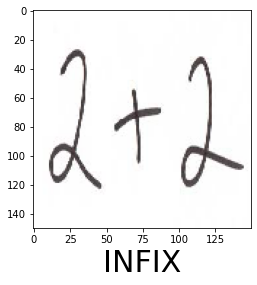

In [37]:
predictImage('2+2.jpg')

[[0. 1. 0.]]


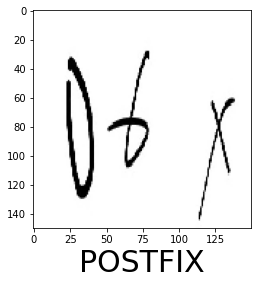

In [38]:
predictImage('2.jpg')

[[0. 0. 1.]]


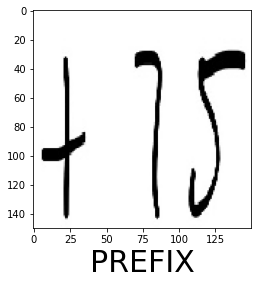

In [39]:
predictImage('5.jpg')